In [12]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [14]:
coordinates = list(lats_lngs)
coordinates

[(0.7801811984776776, -179.08978103744326),
 (81.24525917572299, 72.94508336697623),
 (-17.792337646242615, -166.98053520822629),
 (-22.28860422627237, -114.69891522966323),
 (38.03777514071467, -70.60007274623328),
 (-42.75124597678196, -22.664690562300706),
 (-24.72743472509586, 33.24987914236817),
 (14.509036111833211, -134.36859304594395),
 (82.8738461678636, -44.43851372570154),
 (-18.554248401534736, 135.36486295984054),
 (58.20384773747176, 164.20576515133195),
 (2.246166364321951, -129.269527119396),
 (-66.81195895064697, 46.83729758017651),
 (-45.38127202248252, 75.83924567818198),
 (-65.43931171241533, 171.43952724158197),
 (82.58989044725814, -123.27356391033038),
 (-4.9819975494994395, 160.94977755153513),
 (3.468841230826115, 4.929446270070855),
 (35.661677556804776, -70.30571370302683),
 (-34.960714261268464, -176.70166767787452),
 (89.88175657100948, -118.95173345048889),
 (-82.41718560715123, 28.48199152474524),
 (-71.00850621139888, -82.84345090536723),
 (-77.232236865

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print((cities))

['vaitupu', 'dikson', 'alofi', 'rikitea', 'nantucket', 'arraial do cabo', 'chibuto', 'hilo', 'ilulissat', 'ngukurr', 'ossora', 'atuona', 'east london', 'mahebourg', 'bluff', 'tuktoyaktuk', 'buala', 'yenagoa', 'brigantine', 'vaini', 'kruisfontein', 'punta arenas', 'hobart', 'vao', 'belushya guba', 'kapaa', 'sao joao da barra', 'saleaula', 'geraldton', 'linhares', 'iqaluit', 'busselton', 'cape town', 'bredasdorp', 'hermanus', 'ushuaia', 'rocha', 'harper', 'bellevue', 'makakilo city', 'barrow', 'cidreira', 'soure', 'bilma', 'ust-tsilma', 'punta de bombon', 'new norfolk', 'carbonear', 'solnechnyy', 'dingle', 'illoqqortoormiut', 'mataura', 'faanui', 'hithadhoo', 'husavik', 'artyk', 'tiksi', 'maragogi', 'tsihombe', 'touros', 'taolanaro', 'fortuna', 'bengkulu', 'gimli', 'afonso bezerra', 'butaritari', 'tasiilaq', 'albany', 'saint-pierre', 'ancud', 'torbay', 'nizhneyansk', 'norman wells', 'mount gambier', 'high level', 'pangody', 'sulangan', 'sao filipe', 'san quintin', 'codrington', 'kavieng'

In [16]:
# create an empty list for weather data
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    print(i)
    if (i % 50==0 and i >= 50):
        set_count += 1
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
     # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
        # Parse the JSON and retrieve data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    

Beginning Data Retrieval     
-----------------------------
0
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
1
Processing Record 2 of Set 1 | dikson
2
Processing Record 3 of Set 1 | alofi
3
Processing Record 4 of Set 1 | rikitea
4
Processing Record 5 of Set 1 | nantucket
5
Processing Record 6 of Set 1 | arraial do cabo
6
Processing Record 7 of Set 1 | chibuto
7
Processing Record 8 of Set 1 | hilo
8
Processing Record 9 of Set 1 | ilulissat
9
Processing Record 10 of Set 1 | ngukurr
City not found. Skipping...
10
Processing Record 11 of Set 1 | ossora
11
Processing Record 12 of Set 1 | atuona
12
Processing Record 13 of Set 1 | east london
13
Processing Record 14 of Set 1 | mahebourg
14
Processing Record 15 of Set 1 | bluff
15
Processing Record 16 of Set 1 | tuktoyaktuk
16
Processing Record 17 of Set 1 | buala
17
Processing Record 18 of Set 1 | yenagoa
18
Processing Record 19 of Set 1 | brigantine
19
Processing Record 20 of Set 1 | vaini
20
Processing Record 21 of Set 1

173
Processing Record 174 of Set 4 | manggar
174
Processing Record 175 of Set 4 | gilbues
175
Processing Record 176 of Set 4 | obidos
176
Processing Record 177 of Set 4 | skagastrond
City not found. Skipping...
177
Processing Record 178 of Set 4 | vardo
178
Processing Record 179 of Set 4 | morant bay
179
Processing Record 180 of Set 4 | mwandiga
180
Processing Record 181 of Set 4 | guarapari
181
Processing Record 182 of Set 4 | luderitz
182
Processing Record 183 of Set 4 | kaitong
183
Processing Record 184 of Set 4 | samalaeulu
City not found. Skipping...
184
Processing Record 185 of Set 4 | dunedin
185
Processing Record 186 of Set 4 | sikonge
186
Processing Record 187 of Set 4 | ketchikan
187
Processing Record 188 of Set 4 | mehamn
188
Processing Record 189 of Set 4 | porto santo
189
Processing Record 190 of Set 4 | bandarbeyla
190
Processing Record 191 of Set 4 | bonavista
191
Processing Record 192 of Set 4 | lolua
City not found. Skipping...
192
Processing Record 193 of Set 4 | cler

341
Processing Record 342 of Set 7 | vodyane
342
Processing Record 343 of Set 7 | virginia beach
343
Processing Record 344 of Set 7 | sola
344
Processing Record 345 of Set 7 | acarau
345
Processing Record 346 of Set 7 | batemans bay
346
Processing Record 347 of Set 7 | kahului
347
Processing Record 348 of Set 7 | samusu
City not found. Skipping...
348
Processing Record 349 of Set 7 | itoman
349
Processing Record 350 of Set 7 | kawalu
350
Processing Record 351 of Set 8 | mabaruma
351
Processing Record 352 of Set 8 | wani
352
Processing Record 353 of Set 8 | san ignacio
353
Processing Record 354 of Set 8 | kyren
354
Processing Record 355 of Set 8 | karera
355
Processing Record 356 of Set 8 | komsomolskiy
356
Processing Record 357 of Set 8 | samana
357
Processing Record 358 of Set 8 | martapura
358
Processing Record 359 of Set 8 | ourem
359
Processing Record 360 of Set 8 | bhimunipatnam
360
Processing Record 361 of Set 8 | grindavik
361
Processing Record 362 of Set 8 | oksfjord
362
Proces

515
Processing Record 516 of Set 11 | trang
516
Processing Record 517 of Set 11 | kiruna
517
Processing Record 518 of Set 11 | huatulco
518
Processing Record 519 of Set 11 | srednekolymsk
519
Processing Record 520 of Set 11 | enid
520
Processing Record 521 of Set 11 | timra
521
Processing Record 522 of Set 11 | sept-iles
522
Processing Record 523 of Set 11 | obo
523
Processing Record 524 of Set 11 | jeremoabo
524
Processing Record 525 of Set 11 | mumford
525
Processing Record 526 of Set 11 | wulanhaote
City not found. Skipping...
526
Processing Record 527 of Set 11 | pangkalanbuun
527
Processing Record 528 of Set 11 | broome
528
Processing Record 529 of Set 11 | ambanja
529
Processing Record 530 of Set 11 | alekseyevka
530
Processing Record 531 of Set 11 | manzanillo
531
Processing Record 532 of Set 11 | clyde river
532
Processing Record 533 of Set 11 | les cayes
533
Processing Record 534 of Set 11 | kogon
534
Processing Record 535 of Set 11 | shirokiy
535
Processing Record 536 of Set 

In [17]:
print(len(city_data))

554


In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,21.87,92,38,6.58,RU,2020-10-25 02:57:45
1,Alofi,-19.06,-169.92,80.60,78,94,17.22,NU,2020-10-25 02:59:00
2,Rikitea,-23.12,-134.97,74.88,82,97,20.71,PF,2020-10-25 02:57:26
3,Nantucket,41.28,-70.10,57.99,85,90,17.22,US,2020-10-25 02:58:25
4,Arraial Do Cabo,-22.97,-42.03,69.98,92,100,21.94,BR,2020-10-25 02:58:05
5,Chibuto,-24.69,33.53,64.18,99,3,1.36,MZ,2020-10-25 03:02:55
6,Hilo,19.73,-155.09,82.40,69,75,12.75,US,2020-10-25 03:02:24
7,Ilulissat,69.22,-51.10,19.40,57,3,6.93,GL,2020-10-25 02:59:16
8,Ossora,59.24,163.07,41.47,82,100,10.11,RU,2020-10-25 03:02:55
9,Atuona,-9.80,-139.03,78.66,75,30,20.56,PF,2020-10-25 03:02:55


In [19]:
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_order_column] 
city_data_df .head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-10-25 02:57:45,73.51,80.55,21.87,92,38,6.58
1,Alofi,NU,2020-10-25 02:59:00,-19.06,-169.92,80.60,78,94,17.22
2,Rikitea,PF,2020-10-25 02:57:26,-23.12,-134.97,74.88,82,97,20.71
3,Nantucket,US,2020-10-25 02:58:25,41.28,-70.10,57.99,85,90,17.22
4,Arraial Do Cabo,BR,2020-10-25 02:58:05,-22.97,-42.03,69.98,92,100,21.94
5,Chibuto,MZ,2020-10-25 03:02:55,-24.69,33.53,64.18,99,3,1.36
6,Hilo,US,2020-10-25 03:02:24,19.73,-155.09,82.40,69,75,12.75
7,Ilulissat,GL,2020-10-25 02:59:16,69.22,-51.10,19.40,57,3,6.93
8,Ossora,RU,2020-10-25 03:02:55,59.24,163.07,41.47,82,100,10.11
9,Atuona,PF,2020-10-25 03:02:55,-9.80,-139.03,78.66,75,30,20.56


In [20]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

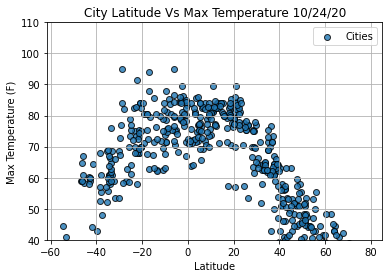

In [22]:
import time
plt.scatter(lats, max_temps, alpha=0.8, edgecolor="Black", linewidths=1, marker="o", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(40,110)
plt.title(f"City Latitude Vs Max Temperature " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()


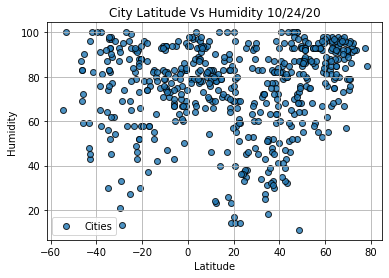

In [23]:
# Scatter plot for latitide vs humidity
plt.scatter(lats, humidity, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude Vs Humidity " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


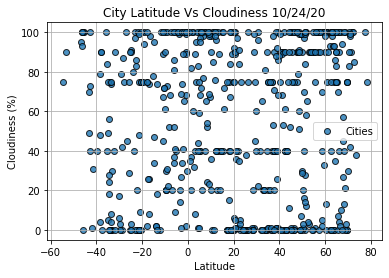

In [24]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, cloudiness, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

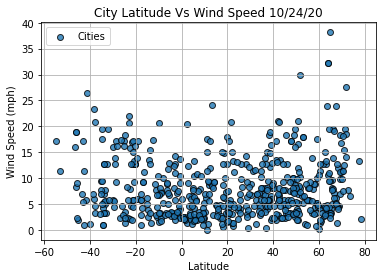

In [25]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, wind_speed, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
(slope, intercept, r_value, p_value, std_err)

(-0.4134108854213051,
 68.12759289248395,
 -0.6690546937127697,
 3.62197488260617e-73,
 0.019546281284166897)

In [27]:
# Get the equation of the line.
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)
print(f"p value is {p_value:.2f}")

y =-0.41x +68.13
p value is 0.00


In [28]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(slope*lat) + intercept for lat in lats]
regress_values

[37.737758705163806,
 76.00720436861403,
 77.68565256342453,
 51.061991542292475,
 77.62364093061133,
 78.33470765353597,
 59.970996123121594,
 39.51129140362121,
 43.637132040125834,
 72.17901956961273,
 81.77842032909544,
 76.56530906393279,
 87.39254015311677,
 39.416206899974306,
 71.49275749981337,
 66.09361133621113,
 51.83506989803031,
 76.89190366341562,
 82.18356299680832,
 90.10038145262631,
 85.85465165934951,
 77.49961766498494,
 58.999480542381534,
 77.07380445300099,
 80.02142406605489,
 76.14362996080305,
 41.77264894687575,
 82.03886918691086,
 82.15462423482883,
 82.40267076608161,
 82.35719556868527,
 90.78250941357146,
 82.38200022181054,
 66.31685321433864,
 48.44510063757561,
 59.30127048873908,
 38.6555308707991,
 80.60433341449894,
 68.42524872998729,
 60.400943443959754,
 41.07398455051374,
 75.22585779516776,
 85.81331057080737,
 48.395491331325054,
 47.15939278391535,
 63.58007315284959,
 87.22304169009402,
 74.94060428422705,
 68.37563942373673,
 40.825938019

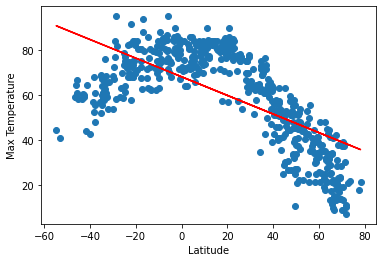

In [29]:
# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq,(-40,0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression (x_values, y_values,title,y_label,text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    regress_values = [(slope*x) + intercept for x in x_values]
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

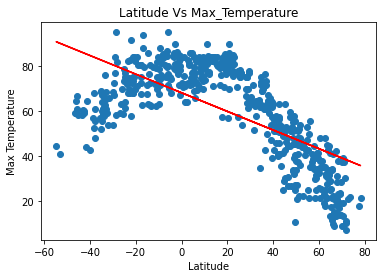

In [31]:
plot_linear_regression(lats,max_temps,"Latitude Vs Max_Temperature", "Max Temperature", (-40,0))

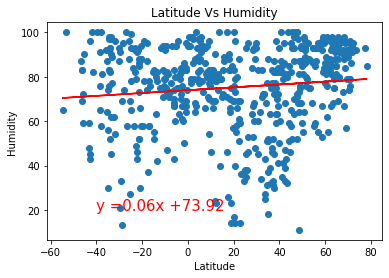

In [32]:
plot_linear_regression(lats,humidity,"Latitude Vs Humidity", "Humidity", (-40, 20))

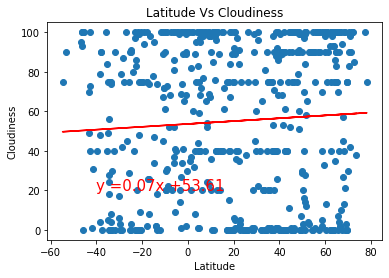

In [33]:
plot_linear_regression(lats,cloudiness,"Latitude Vs Cloudiness", "Cloudiness", (-40, 20))

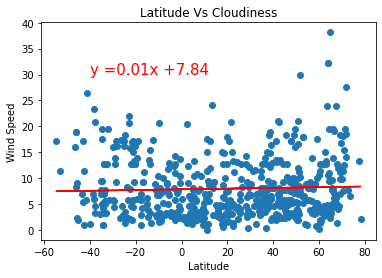

In [34]:
plot_linear_regression(lats,wind_speed,"Latitude Vs Cloudiness", "Wind Speed", (-40, 30))

In [35]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-10-25 02:57:45,73.51,80.55,21.87,92,38,6.58
1,Alofi,NU,2020-10-25 02:59:00,-19.06,-169.92,80.60,78,94,17.22
2,Rikitea,PF,2020-10-25 02:57:26,-23.12,-134.97,74.88,82,97,20.71
3,Nantucket,US,2020-10-25 02:58:25,41.28,-70.10,57.99,85,90,17.22
4,Arraial Do Cabo,BR,2020-10-25 02:58:05,-22.97,-42.03,69.98,92,100,21.94
5,Chibuto,MZ,2020-10-25 03:02:55,-24.69,33.53,64.18,99,3,1.36
6,Hilo,US,2020-10-25 03:02:24,19.73,-155.09,82.40,69,75,12.75
7,Ilulissat,GL,2020-10-25 02:59:16,69.22,-51.10,19.40,57,3,6.93
8,Ossora,RU,2020-10-25 03:02:55,59.24,163.07,41.47,82,100,10.11
9,Atuona,PF,2020-10-25 03:02:55,-9.80,-139.03,78.66,75,30,20.56


In [36]:
index13 = city_data_df.loc[13]
index13.dtypes

dtype('O')

In [37]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-10-25 02:57:45,73.51,80.55,21.87,92,38,6.58
3,Nantucket,US,2020-10-25 02:58:25,41.28,-70.10,57.99,85,90,17.22
6,Hilo,US,2020-10-25 03:02:24,19.73,-155.09,82.40,69,75,12.75
7,Ilulissat,GL,2020-10-25 02:59:16,69.22,-51.10,19.40,57,3,6.93
8,Ossora,RU,2020-10-25 03:02:55,59.24,163.07,41.47,82,100,10.11


In [38]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Alofi,NU,2020-10-25 02:59:00,-19.06,-169.92,80.60,78,94,17.22
2,Rikitea,PF,2020-10-25 02:57:26,-23.12,-134.97,74.88,82,97,20.71
4,Arraial Do Cabo,BR,2020-10-25 02:58:05,-22.97,-42.03,69.98,92,100,21.94
5,Chibuto,MZ,2020-10-25 03:02:55,-24.69,33.53,64.18,99,3,1.36
9,Atuona,PF,2020-10-25 03:02:55,-9.80,-139.03,78.66,75,30,20.56


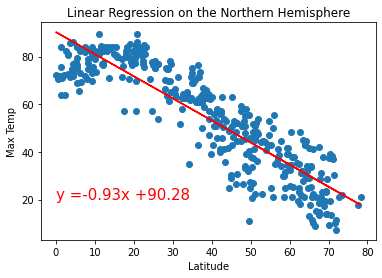

In [39]:
# Perform linear regression on Souther hemispear
northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_temp, "Linear Regression on the Northern Hemisphere", "Max Temp", (0,20))

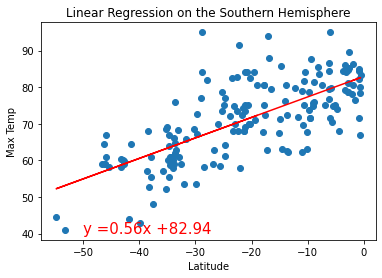

In [40]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_temp, "Linear Regression on the Southern Hemisphere", "Max Temp", (-50,40))

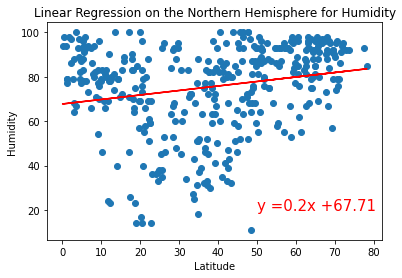

In [41]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_humid = northern_hemi_df["Humidity"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_humid, "Linear Regression on the Northern Hemisphere for" +
                       " Humidity", "Humidity", (50,20))

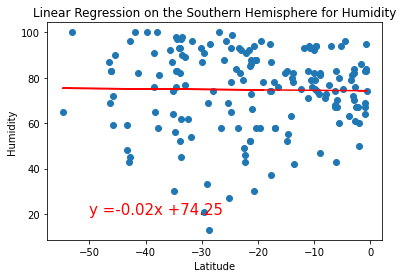

In [42]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_humid = southern_hemi_df["Humidity"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_humid, "Linear Regression on the Southern Hemisphere for Humidity", "Humidity", (-50,20))

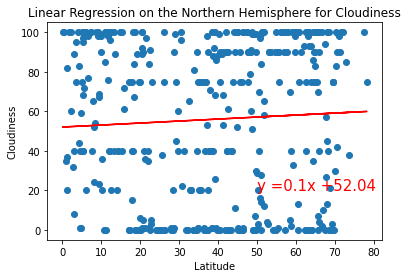

In [43]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_cloudiness, "Linear Regression on the Northern Hemisphere for" +
                       " Cloudiness", "Cloudiness", (50,20))

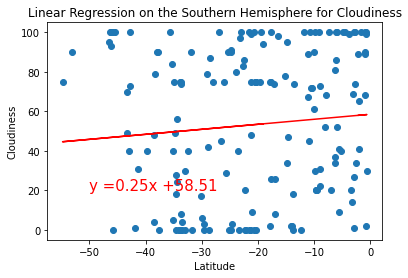

In [44]:
# Perform linear regression on Southern hemispear
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_cloudiness, "Linear Regression on the Southern Hemisphere for Cloudiness", "Cloudiness", (-50,20))

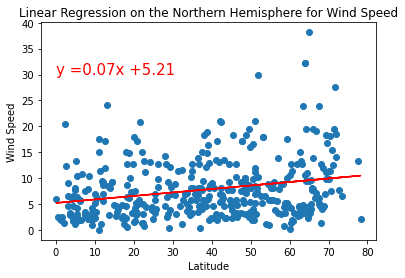

In [45]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_windspeed = northern_hemi_df["Wind Speed"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_windspeed, "Linear Regression on the Northern Hemisphere for" +
                       " Wind Speed", "Wind Speed", (0,30))

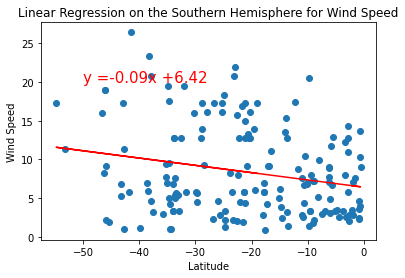

In [46]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_windspeed = southern_hemi_df["Wind Speed"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_windspeed, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-50,20))